<a href="https://colab.research.google.com/github/BryanDanielMartinezCabezas/Inteligencia_Artificial_AI_SIS420/blob/main/Examen_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Data sete lab 1/FETOS/fetal_health.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
# Cargar el dataset original
file_path = '/content/gdrive/MyDrive/Data sete lab 1/FETOS/fetal_health.csv'
data = pd.read_csv(file_path)

# Convertir el DataFrame a un array de numpy
data_array = data.to_numpy()

# Definir las columnas numéricas para añadir pequeñas variaciones (excepto la columna 'fetal_health')
numeric_columns = np.arange(data_array.shape[1] - 1)  # Todas las columnas excepto la última (fetal_health)

# Duplicar el dataset
duplicated_data = data_array.copy()

# Añadir ruido gaussiano a las columnas numéricas dentro de un rango coherente
noise = np.random.normal(0, 0.01, duplicated_data[:, numeric_columns].shape)  # Ajustar el nivel de ruido según la necesidad
duplicated_data[:, numeric_columns] += noise

# Redondear los valores numéricos a la cantidad de decimales deseada (por ejemplo, 2 decimales)
duplicated_data[:, numeric_columns] = np.round(duplicated_data[:, numeric_columns], 3)  # Redondear a 3 decimales

# Asegurar que 'fetal_health' se mantenga como entero
duplicated_data[:, -1] = duplicated_data[:, -1].astype(int)

# Crear atributos adicionales
# 1. Añadir el atributo 'high_risk'
high_risk = (data_array[:, 5] > 0.5)  # Ejemplo basado en 'severe_decelerations'
duplicated_high_risk = (duplicated_data[:, 5] > 0.5)

# 2. Añadir el atributo 'risk_category'
risk_category = np.where(data_array[:, 5] > 0.5, 'Alto', 'Bajo')  # Basado en 'severe_decelerations'
duplicated_risk_category = np.where(duplicated_data[:, 5] > 0.5, 'Alto', 'Bajo')

# 3. Convertir el atributo de texto (categoría) en numérico: 'Alto' = 1, 'Bajo' = 0
risk_category_numeric = np.where(risk_category == 'Alto', 1, 0)
duplicated_risk_category_numeric = np.where(duplicated_risk_category == 'Alto', 1, 0)

# Concatenar el dataset original y el dataset duplicado
final_data = np.vstack((data_array, duplicated_data))

# Concatenar los nuevos atributos
final_high_risk = np.concatenate((high_risk, duplicated_high_risk))
final_risk_category = np.concatenate((risk_category, duplicated_risk_category))
final_risk_category_numeric = np.concatenate((risk_category_numeric, duplicated_risk_category_numeric))

# Crear el DataFrame final con los nuevos atributos
final_df = pd.DataFrame(final_data, columns=data.columns)
final_df['high_risk'] = final_high_risk
final_df['risk_category'] = final_risk_category
final_df['risk_category_numeric'] = final_risk_category_numeric

# Guardar el nuevo dataset en un archivo CSV
output_path = '/content/gdrive/MyDrive/Data sete lab 1/FETOS/fetal_health_duplicated_with_attributes.csv'
final_df.to_csv(output_path, index=False)

print("Dataset duplicado con nuevos atributos creado con éxito.")

Dataset duplicado con nuevos atributos creado con éxito.


In [ ]:
# Cargar el nuevo dataset con los atributos añadidos
file_path = '/content/gdrive/MyDrive/Data sete lab 1/FETOS/fetal_health_duplicated_with_attributes.csv'
final_df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
final_df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,high_risk,risk_category,risk_category_numeric
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,0.0,120.0,137.0,121.0,73.0,1.0,2.0,False,Bajo,0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,1.0,141.0,136.0,140.0,12.0,0.0,1.0,False,Bajo,0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,1.0,141.0,135.0,138.0,13.0,0.0,1.0,False,Bajo,0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,0.0,137.0,134.0,137.0,13.0,1.0,1.0,False,Bajo,0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,0.0,137.0,136.0,138.0,11.0,1.0,1.0,False,Bajo,0


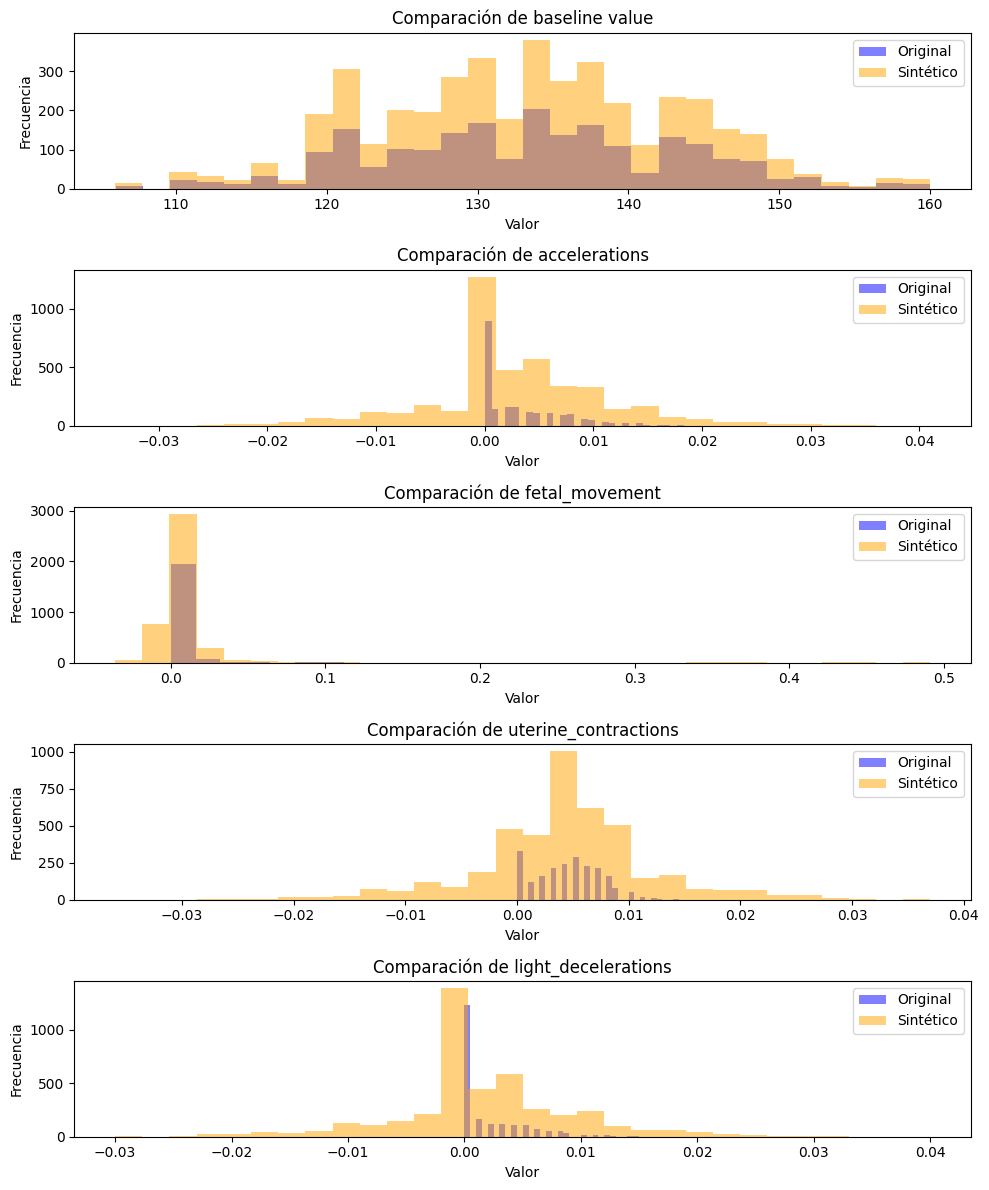

In [ ]:
# Cargar los datasets
initial_data = pd.read_csv('/content/gdrive/MyDrive/Data sete lab 1/FETOS/fetal_health.csv')
synthetic_data = pd.read_csv('/content/gdrive/MyDrive/Data sete lab 1/FETOS/fetal_health_duplicated_with_attributes.csv')

# Seleccionar algunas columnas para graficar
columns_to_plot = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations']

# Crear un gráfico para cada columna seleccionada
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 12))

for ax, column in zip(axes, columns_to_plot):
    ax.hist(initial_data[column], bins=30, alpha=0.5, label='Original', color='blue')
    ax.hist(synthetic_data[column], bins=30, alpha=0.5, label='Sintético', color='orange')
    ax.set_title(f'Comparación de {column}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.legend()

plt.tight_layout()
plt.show()




In [ ]:
# Cargar el nuevo dataset con los atributos añadidos
file_path = '/content/gdrive/MyDrive/Data sete lab 1/FETOS/fetal_health_duplicated_with_attributes.csv'
final_df = pd.read_csv(file_path)

# Reemplazar valores NaN con valores predeterminados
final_df['high_risk'].fillna('False', inplace=True)
final_df['risk_category'].fillna('Bajo', inplace=True)

# Convertir la columna 'high_risk' a un array de numpy
high_risk_column = final_df['high_risk'].values

# Reemplazar 'NaN' con 'False'
high_risk_column = np.where(pd.isna(high_risk_column), 'False', high_risk_column)

# Convertir la columna a valores numéricos: 'True' = 1, 'False' = 0
high_risk_numeric = np.where(high_risk_column == 'True', 1, 0)

# Reemplazar la columna en el DataFrame
final_df['high_risk'] = high_risk_numeric

# Convertir la columna 'risk_category' a formato numérico
final_df['risk_category'] = final_df['risk_category'].map({'Alto': 1, 'Bajo': 0})

# Convertir todas las columnas restantes a tipo flotante
final_df = final_df.astype(float)

# Mostrar las primeras filas del dataset para verificar las conversiones
print(final_df.head())
# Guardar el dataset alterado en un nuevo archivo CSV
output_path = '/content/gdrive/MyDrive/Data sete lab 1/FETOS/fetal_health_altered.csv'
final_df.to_csv(output_path, index=False)

print("Dataset alterado guardado con éxito en:", output_path)


   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

In [ ]:
# Cargar el dataset alterado
file_pathh = '/content/gdrive/MyDrive/Data sete lab 1/FETOS/fetal_health_altered.csv'
dataa = pd.read_csv(file_pathh)

# Para X se toman todas las columnas menos la columna 21
X = dataa.drop(columns=dataa.columns[21])

# Para y se toma la columna 21
y = dataa.iloc[:, 21]

print(X.shape)
print(y.shape)
print("-------------------------------")
print(X.head())
print("-------------------------------")
print(y.head())


(4252, 24)
(4252,)
-------------------------------
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_ter

In [ ]:
# Ver información de los datos
print('Shape: ', dataa.shape)
print('Data types:')
print(dataa.dtypes)


Shape:  (4252, 25)
Data types:
baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                    

# Division de datos

In [ ]:
# Convertir el DataFrame a un array de numpy
data_array = dataa.values

# Definir el tamaño del conjunto de entrenamiento (80% de los datos)
train_size = int(0.8 * len(data_array))

# Barajar los datos
np.random.shuffle(data_array)

# Separar características y etiquetas en el array completo
X = data_array[:, np.arange(data_array.shape[1]) != 21]  # Excluir la columna 21 (índice 20)
y = data_array[:, 21]   # Seleccionar la columna 21 (índice 20) como la variable objetivo

# Dividir los datos en entrenamiento y prueba
train_X = X[:train_size]
train_y = y[:train_size]
test_X = X[train_size:]
test_y = y[train_size:]

# Verificar la forma de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {train_X.shape[0]}')
print(f'Tamaño del conjunto de prueba: {test_X.shape[0]}')



Tamaño del conjunto de entrenamiento: 3401
Tamaño del conjunto de prueba: 851


# **Binaria**

In [ ]:
def calcularSigmoide(z):
    # Calcula la sigmoide de z.

    return 1.0 / (1.0 + np.exp(-z))

# Función de coste con regularización
def calcularCosto(theta, X, y, lambda_):
    m = len(y)
    h = calcularSigmoide(X @ theta)
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    J = (-1 / m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h))) + reg_term

    grad = (1 / m) * X.T @ (h - y)
    grad[1:] += (lambda_ / m) * theta[1:]

    return J, grad

# Gradiente descendente que guarda el coste y la precisión en cada epoch
def gradient_descent(X, y, theta, lambda_, alpha, num_iters):
    J_history = []
    accuracy_history = []

    for _ in range(num_iters):
        J, grad = calcularCosto(theta, X, y, lambda_)
        theta -= alpha * grad
        J_history.append(J)  # Guardar el costo en cada epoch

    return theta, J_history, accuracy_history

# Regresión logística binaria para cada clase
def binary_logistic_regression(X, y, num_labels, lambda_, alpha, num_iters):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n))
    all_J_history = []  # Para guardar el historial de costo por clase

    # Entrenamos un modelo de regresión logística binaria para cada clase
    for i in range(num_labels):
        initial_theta = np.zeros(n)
        y_i = (y == i+1).astype(int)  # Crear etiquetas binarias para la clase i
        theta, J_history, accuracy_history = gradient_descent(X, y_i, initial_theta, lambda_, alpha, num_iters)
        all_theta[i] = theta
        all_J_history.append(J_history)  # Guardar historial de costo

    return all_theta, all_J_history
# Predicción
def predict_binary(all_theta, X):
    probabilities = calcularSigmoide(X @ all_theta.T)
    return np.argmax(probabilities, axis=1) + 1  # Clase con la mayor probabilidad


def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Normalizar las características
X_train_norm, mu, sigma = featureNormalize(train_X)
X_test_norm = (test_X - mu) / sigma
# Se anade una columna de unos a X train y X test
X_train = np.hstack([np.ones((X_train_norm.shape[0], 1)), X_train_norm])
X_test = np.hstack([np.ones((X_test_norm.shape[0], 1)), X_test_norm])

# Parámetros del modelo
num_labels = len(np.unique(train_y))  # Número de clases
lambda_ = 0.1
alpha = 0.01
num_iters = 10000

# Realizar el entrenamiento y obtener el historial de costo y precisión
all_theta, all_J_history = binary_logistic_regression(X_train, train_y, num_labels, lambda_, alpha, num_iters)

# Realizar las predicciones para el conjunto de entrenamiento
train_pred = predict_binary(all_theta, X_train)
train_accuracy = np.mean(train_pred == train_y) * 100
print(f'Precisión en conjunto de entrenamiento: {train_accuracy:.2f}%')

# Realizar las predicciones para el conjunto de prueba
test_pred = predict_binary(all_theta, X_test)
test_accuracy = np.mean(test_pred == test_y) * 100
print(f'Precisión en conjunto de prueba: {test_accuracy:.2f}%')




Precisión en conjunto de entrenamiento: 87.77%
Precisión en conjunto de prueba: 86.49%


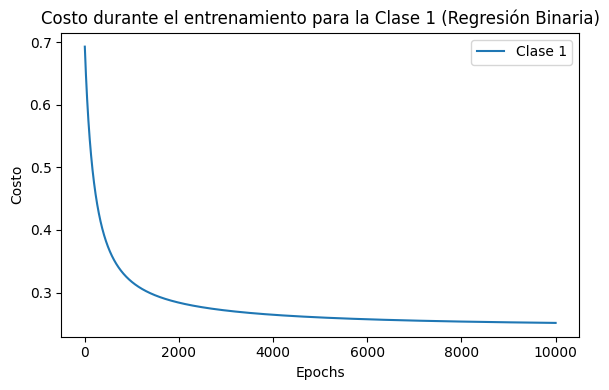

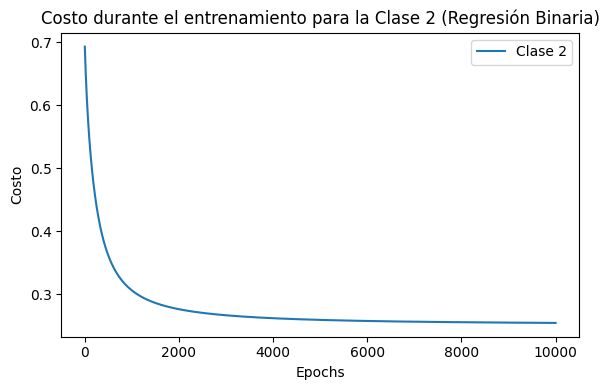

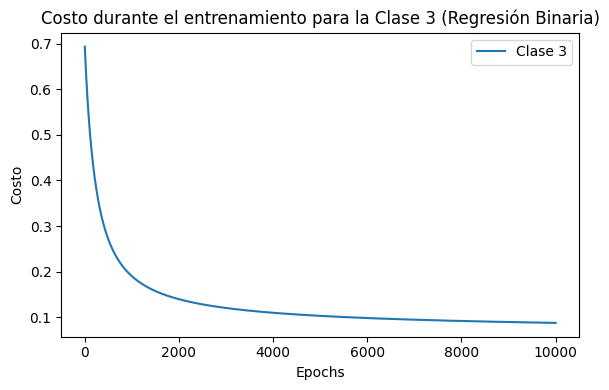

In [ ]:
# Visualización del costo y la precisión

# Graficar el costo por clase
for i in range(num_labels):
    plt.figure(figsize=(6, 4))
    plt.plot(all_J_history[i], label=f'Clase {i+1}')
    plt.title(f'Costo durante el entrenamiento para la Clase {i+1} (Regresión Binaria)')
    plt.xlabel('Epochs')
    plt.ylabel('Costo')
    plt.legend()
    plt.tight_layout()
    plt.show()




In [ ]:


Numero_de_predicciones=15



# Verificar la forma de train_y
print(test_y.shape)


if len(test_y.shape) == 1:
    num_columns = 1
else:
    num_columns = test_y.shape[1]

column_names = [f'Columna {i+1}' for i in range(num_columns)]

# Crear el DataFrame con los nombres de columnas ajustados
df = pd.DataFrame(test_y.reshape(-1, num_columns), columns=column_names)

# Mostrar las primeras 5 filas del DataFrame
print(df.head(Numero_de_predicciones))




(851,)
    Columna 1
0         2.0
1         1.0
2         1.0
3         1.0
4         1.0
5         2.0
6         1.0
7         1.0
8         1.0
9         1.0
10        1.0
11        2.0
12        1.0
13        1.0
14        1.0


In [ ]:
# Seleccionar las primeras 20 muestras de los datos de prueba
X_test_20 = X_test[:Numero_de_predicciones]

# Hacer predicciones sobre esas 20 muestras
test_pred_20 = predict_binary(all_theta, X_test_20)

# Mostrar las 20 predicciones
print("Predicciones para las primeras 20 muestras del conjunto de prueba:")
print(test_pred_20)

Predicciones para las primeras 20 muestras del conjunto de prueba:
[1 1 1 1 1 2 1 1 1 1 1 1 1 3 1]


In [ ]:
# Seleccionar las primeras 20 etiquetas reales
test_y_20 = test_y[:Numero_de_predicciones]

# Calcular el porcentaje de acierto
accuracy_20 = np.mean(test_pred_20 == test_y_20) * 100

# Mostrar el porcentaje de acierto
print(f'Porcentaje de acierto en las primeras 20 predicciones: {accuracy_20:.2f}%')

# Contar cuántas predicciones acertaron
aciertos_20 = np.sum(test_pred_20 == test_y_20)

# Mostrar el número de aciertos
print(f'Número de predicciones acertadas en las primeras: {Numero_de_predicciones}  muestras: {aciertos_20}')

Porcentaje de acierto en las primeras 20 predicciones: 80.00%
Número de predicciones acertadas en las primeras: 15  muestras: 12


# **Regresion Logistica Multiclase ONE VS ALL**

In [ ]:
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    sigma[sigma == 0] = 1  # Evitar división por cero
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [ ]:
X_train_norm, mu, sigma = feature_normalize(train_X)
X_test_norm = (test_X - mu) / sigma


In [ ]:
X_train = np.hstack([np.ones((X_train_norm.shape[0], 1)), X_train_norm])
X_test = np.hstack([np.ones((X_test_norm.shape[0], 1)), X_test_norm])

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def cost_function(theta, X, y, lambda_):
    m = len(y)
    h = sigmoid(X @ theta)
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    J = (-1 / m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h))) + reg_term

    grad = (1 / m) * X.T @ (h - y)
    grad[1:] += (lambda_ / m) * theta[1:]

    return J, grad

In [ ]:
# Parámetros para el entrenamiento
num_labels = len(np.unique(train_y))
lambda_ = 0.1
alpha = 0.01
num_iters = 10000

In [ ]:
def one_vs_all(X, y, num_labels, lambda_, alpha, num_iters):
    n = X.shape[1]
    all_theta = np.zeros((num_labels, n))
    all_J_history = []  # Para guardar el historial de costo por clase

    for i in range(num_labels):
        initial_theta = np.zeros(n)
        y_i = (y == i+1).astype(int)
        theta, J_history = gradient_descent(X, y_i, initial_theta, lambda_, alpha, num_iters)
        all_theta[i] = theta
        all_J_history.append(J_history)  # Guardar historial de costo



    return all_theta, all_J_history

In [ ]:
# Función para predecir
def predict_one_vs_all(all_theta, X):
    return np.argmax(sigmoid(X @ all_theta.T), axis=1) + 1


In [ ]:
def gradient_descent(X, y, theta, lambda_, alpha, num_iters):
    J_history = []

    for _ in range(num_iters):
        J, grad = cost_function(theta, X, y, lambda_)
        theta = theta - alpha * grad
        J_history.append(J)

    return theta, J_history

In [ ]:
all_theta, all_J_history = one_vs_all(X_train, train_y, num_labels, lambda_, alpha, num_iters)

In [ ]:

# Calcular la precisión en el conjunto de entrenamiento y prueba
train_pred = predict_one_vs_all(all_theta, X_train)
train_accuracy = np.mean(train_pred == train_y) * 100
print(f'Precisión en conjunto de entrenamiento: {train_accuracy:.2f}%')

test_pred = predict_one_vs_all(all_theta, X_test)
test_accuracy = np.mean(test_pred == test_y) * 100
print(f'Precisión en conjunto de prueba: {test_accuracy:.2f}%')
J_train, _ = cost_function(all_theta[0], X_train, (train_y == 1).astype(int), lambda_)
print(f'Costo en el conjunto de entrenamiento: {J_train:.4f}')

J_test, _ = cost_function(all_theta[0], X_test, (test_y == 1).astype(int), lambda_)
print(f'Costo en el conjunto de prueba : {J_test:.4f}')

Precisión en conjunto de entrenamiento: 87.77%
Precisión en conjunto de prueba: 86.49%
Costo en el conjunto de entrenamiento: 0.2514
Costo en el conjunto de prueba : 0.2624


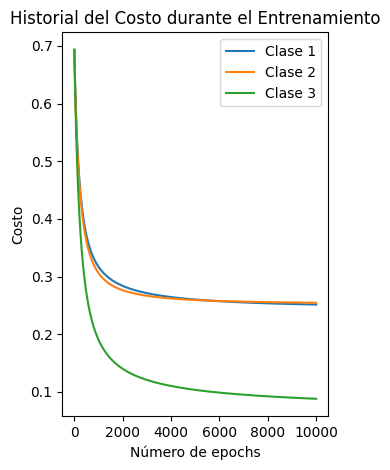

In [ ]:
# Graficar el costo
plt.subplot(1, 2, 1)
for i in range(num_labels):
    plt.plot(range(num_iters), all_J_history[i], label=f'Clase {i+1}')
plt.xlabel('Número de epochs')
plt.ylabel('Costo')
plt.title('Historial del Costo durante el Entrenamiento')
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
Numero_de_predicciones=15



# Verificar la forma de train_y
print(train_y.shape)

# Ajustar el número de nombres de columnas según la forma de train_y
if len(train_y.shape) == 1:
    num_columns = 1
else:
    num_columns = train_y.shape[1]

column_names = [f'Columna {i+1}' for i in range(num_columns)]

# Crear el DataFrame con los nombres de columnas ajustados
df = pd.DataFrame(train_y.reshape(-1, num_columns), columns=column_names)

# Mostrar las primeras 5 filas del DataFrame
print(df.head(Numero_de_predicciones))

(3401,)
    Columna 1
0         2.0
1         1.0
2         1.0
3         1.0
4         1.0
5         2.0
6         1.0
7         1.0
8         1.0
9         1.0
10        1.0
11        1.0
12        1.0
13        3.0
14        1.0


In [ ]:
# Seleccionar las primeras 20 muestras de los datos de prueba
X_test_20 = X_test[:Numero_de_predicciones]

# Hacer predicciones sobre esas 20 muestras
test_pred_20 = predict_one_vs_all(all_theta, X_test_20)

# Mostrar las 20 predicciones
print(f"Predicciones para las primeras: {Numero_de_predicciones} muestras del conjunto de prueba:")
print(test_pred_20)

Predicciones para las primeras: 15 muestras del conjunto de prueba:
[1 1 1 1 1 2 1 1 1 1 1 1 1 3 1]


In [ ]:
# Seleccionar las primeras 20 etiquetas reales
test_y_20 = test_y[:Numero_de_predicciones]

# Calcular el porcentaje de acierto
accuracy_20 = np.mean(test_pred_20 == test_y_20) * 100

# Mostrar el porcentaje de acierto
print(f'Porcentaje de acierto en las primeras:{Numero_de_predicciones} predicciones: {accuracy_20:.2f}%')

# Contar cuántas predicciones acertaron
aciertos_20 = np.sum(test_pred_20 == test_y_20)

# Mostrar el número de aciertos
print(f'Número de predicciones acertadas en las primeras: {Numero_de_predicciones}  muestras: {aciertos_20}')

Porcentaje de acierto en las primeras:15 predicciones: 80.00%
Número de predicciones acertadas en las primeras: 15  muestras: 12
